<a href="https://colab.research.google.com/github/PaulToronto/University-of-Colorado-Boulder---Essential-Math-Specialization/blob/main/2_3_Properties_of_a_Linear_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 Properties of a Linear System

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

## 2.3.1 Vectors and Linear Combinations

### 2.3.1.1 Introduction to Vectors + Coordinates

- In this course, when we talk about **vectors**, we are specifically talking about **column vectors**, but **row vectors** do exist
- A column vector is a matrix with one column
- The rules for matrix addition, scalar multiplication and multiplication apply

$$
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} +
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix} =
\begin{bmatrix}
x_1 + y_1 \\
x_2 + y_2 \\
\vdots \\
x_n + y_n
\end{bmatrix}
$$

#### Visualizing Vectors

$$
\mathbf{a} = \begin{bmatrix}-2 \\ 1\end{bmatrix},
\mathbf{b} = \begin{bmatrix}4 \\ 3\end{bmatrix}
$$

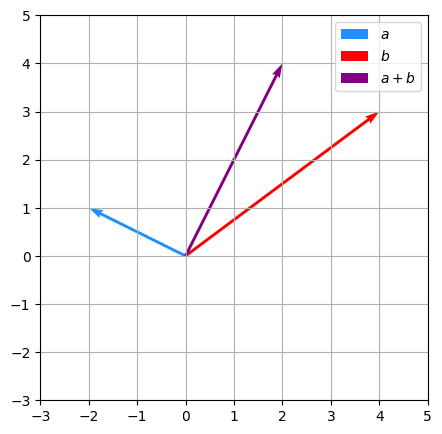

In [2]:
a = np.array([-2, 1])
b = np.array([4, 3])
tail = np.array([0, 0])


plt.figure(figsize=(5, 5))

plt.quiver(*tail, a[0], a[1], scale=1,
           scale_units='xy', angles='xy',
           color='dodgerblue', label=r'$a$')
plt.quiver(*tail, b[0], b[1], scale=1,
           scale_units='xy', angles='xy',
           color='red', label='$b$')
plt.quiver(*tail, (a + b)[0], (a + b)[1], scale=1,
           scale_units='xy', angles='xy',
           color='purple', label='$a + b$')

plt.grid()
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-3, 6))
plt.legend()

plt.show()

#### Parallelogram Rule

If we place two vectors so they have the same initial point, and then complete the vectors into a parallelogram, then the sum of the vectors is the directed diagonal that starts at the same point as the vectors.

### 2.3.1.2 Introduction to Linear Combinations

Let {$v_1$, $v_2$, $\cdots$, $v_n$} be set of column vectors of the same dimension (same number of rows)

$$
y = c_1v_1 + c_2v_2 + \cdots + c_nv_n
$$

$y$ is a **linear combination** of the given set of vectors.

In [3]:
v1 = sym.Matrix([0, 1])
v1

Matrix([
[0],
[1]])

In [4]:
v2 = sym.Matrix([-1, 3])
v2

Matrix([
[-1],
[ 3]])

In [5]:
# here, y is a linear combination of v1 and v2
y = sym.sqrt(3) * v1 + 14 * v2
y

Matrix([
[         -14],
[sqrt(3) + 42]])

### 2.3.1.3 Linear Combinations

$
a_1 = \begin{bmatrix}1 \\ -2 \\ -5\end{bmatrix},
a_2 = \begin{bmatrix}2 \\ 5 \\ 6\end{bmatrix}
$

<br>

$
b = \begin{bmatrix}7 \\ 4 \\ -3\end{bmatrix}
$

<br>

Are there scalars $c_1$ and $c_2$ such that $b = c_1a_1 + c_2a_2$? In other words, is $b$ a linear combination of $a_1$ and $a_2$?

### 2.3.1.4 Linear Combinations Example (continued from previous section)

In [6]:
a1 = sym.Matrix([1, -2, -5])
a2 = sym.Matrix([2, 5, 6])
b = sym.Matrix([7, 4, -3])

$
\begin{align}
&b = c_1a_1 + c_2a_2 \\
&\implies\begin{bmatrix}7 \\ 4 \\ -3\end{bmatrix} = c_1\begin{bmatrix}1 \\ -2 \\ -5\end{bmatrix}
+ c_2\begin{bmatrix}2 \\ 5 \\ 6\end{bmatrix} \\
&\implies\begin{bmatrix}7 \\ 4 \\ -3\end{bmatrix} =
\begin{bmatrix}c_1 + 2c_2\\-2c_1 + 5c_2\\-5c_1 + 6c_2\end{bmatrix}
\end{align}
$

Now we have system of linear equations, which can be represented as an augmented matrix

In [7]:
A = sym.Matrix([[1, 2, 7],
                [-2, 5, 4],
                [-5, 6, -3]])
A

Matrix([
[ 1, 2,  7],
[-2, 5,  4],
[-5, 6, -3]])

$R_2 \leftarrow R_2 + 2R_1$

$R_3 \leftarrow R_3 + 5R_1$

In [8]:
A[1,:] = A.row(1) + 2 * A.row(0)
A[2,:] = A.row(2) + 5 * A.row(0)
A

Matrix([
[1,  2,  7],
[0,  9, 18],
[0, 16, 32]])

$R_2 \leftarrow \frac{1}{9}R_2$

$R_3 \leftarrow \frac{1}{16}R_3$

In [9]:
A[1,:] = sym.Rational(1, 9) * A.row(1)
A[2,:] = sym.Rational(1, 16) * A.row(2)
A

Matrix([
[1, 2, 7],
[0, 1, 2],
[0, 1, 2]])

$R_3 \leftarrow R_3 - R_2$

In [10]:
A[2,:] = A.row(2) - A.row(1)
A

Matrix([
[1, 2, 7],
[0, 1, 2],
[0, 0, 0]])

$R_1 \leftarrow = R_1 - 2R_2$

In [11]:
A[0,:] = A.row(0) - 2 * A.row(1)
A

Matrix([
[1, 0, 3],
[0, 1, 2],
[0, 0, 0]])

In [12]:
c1 = 3
c2 = 2
c1, c2

(3, 2)

In [13]:
c1 * a1 + c2 * a2

Matrix([
[ 7],
[ 4],
[-3]])

In [14]:
b

Matrix([
[ 7],
[ 4],
[-3]])

In [15]:
c1 * a1 + c2 * a2 == b

True

#### Alternate method

In [16]:
A = sym.Matrix([[1, 2, 7],
                [-2, 5, 4],
                [-5, 6, -3]])
A.rref(pivots=False)

Matrix([
[1, 0, 3],
[0, 1, 2],
[0, 0, 0]])

In [17]:
c1 = 3
c2 = 2
c1 * a1 + c2 * a2 == b

True

#### Alternate method

In [18]:
a1, a2, b

(Matrix([
 [ 1],
 [-2],
 [-5]]),
 Matrix([
 [2],
 [5],
 [6]]),
 Matrix([
 [ 7],
 [ 4],
 [-3]]))

In [19]:
c1, c2 = sym.symbols('c_1 c_2')

In [20]:
sym.solve(c1 * a1 + c2 * a2 - b)

{c_1: 3, c_2: 2}

In [21]:
sym.solve(sym.Eq(c1 * a1 + c2 * a2, b))

{c_1: 3, c_2: 2}

## 2.3.2 Linear Independence

### 2.3.2.1 Span

Suppose $S$ is a set of vectors.

$$
S = \{v_1, v_2, \cdots, v_n\}
$$

The **span** of set $S$, denoted $\text{span}(S)$ is the set of all linear combinations of the vectors in $S$.

#### Example

$$
S = \{v_1, v_2\}
$$

where:

$$
v_1 = \begin{bmatrix}1\\0\\0\end{bmatrix},
v_2 = \begin{bmatrix}0\\1\\0\end{bmatrix}
$$

Is $b = \begin{bmatrix}1\\1\\1\end{bmatrix}$ in $\text{span}(S)$?

#### Solution

Let $c_1$ and $c_2$ be scalars. If $b$ is in $\text{span}(S)$, then

$
\begin{align}
&c_1v_1 + c_2v_2 = \begin{bmatrix}1\\1\\1\end{bmatrix} \\
&\implies
c_1\begin{bmatrix}1\\0\\0\end{bmatrix} + c_2\begin{bmatrix}0\\1\\0\end{bmatrix} = \begin{bmatrix}1\\1\\1\end{bmatrix} \\
&\implies
\begin{bmatrix}c_1\\c_2\\0\end{bmatrix} = \begin{bmatrix}1\\1\\1\end{bmatrix}
\end{align}
$

There is no solution.

$\therefore b$ is not in $\text{span}(S)$.

### 2.3.2.2 Span Example

$$
a_1 = \begin{bmatrix}1\\-2\\3\end{bmatrix},
a_2 = \begin{bmatrix}5\\-13\\-3\end{bmatrix},
b = \begin{bmatrix}-3\\8\\1\end{bmatrix},
S = \{v_1, v2\}
$$

Is $b$ in $\text{span}(S)$?


#### Solution:

$$
\begin{align}
\text{span}(S) &= c_1a_1 + c_2a_2 \\
&= \begin{bmatrix}c_1 + 5c_2\\-2c_1 - 13_c2\\3c_1 - 3c_2\end{bmatrix}
\end{align}
$$

Can we find a $c_1$ and $c_2$ such that $b$ is in the span? The span of $S$ is a plane in 3-space. Does $b$ lie on that plane?

$$
\begin{align}
\begin{bmatrix}c_1 + 5c_2\\-2c_1 - 13c_2\\3c_1 - 3c_2\end{bmatrix} &= \begin{bmatrix}-3\\8\\1\end{bmatrix}
\end{align}
$$

This can be expressed as an augmented matrix.

In [22]:
A = sym.Matrix([[1, 5, -3],
                [-2, -13, 8],
                [3, -3, 1]])
A

Matrix([
[ 1,   5, -3],
[-2, -13,  8],
[ 3,  -3,  1]])

$R_2 \leftarrow R_2 + 2R_1$

$R_3 \leftarrow R_3 - 3R_1$

In [23]:
A[1,:] = A.row(1) + 2 * A.row(0)
A[2,:] = A.row(2) - 3 * A.row(0)
A

Matrix([
[1,   5, -3],
[0,  -3,  2],
[0, -18, 10]])

$R_3 \leftarrow R_3 + 6R_2$

In [24]:
A[2,:] = A.row(2) - 6 * A.row(1)
A

Matrix([
[1,  5, -3],
[0, -3,  2],
[0,  0, -2]])

There is no solution.

$\therefore b$ is not in $\text{span}(S)$.

#### Alternate Solutions:

In [25]:
# this also shows there are no solutions
A = sym.Matrix([[1, 5, -3],
                [-2, -13, 8],
                [3, -3, 1]])
A.rref(pivots=False)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [26]:
A = sym.Matrix([[1, 5, -3],
                [-2, -13, 8],
                [3, -3, 1]])
a1 = A.col(0)
a2 = A.col(1)
b = A.col(2)

c1, c2 = sym.symbols('c_1 c_2')

# no solutions
sym.solve(c1 * a1 + c2 * a2 - b)

[]

In [27]:
A = sym.Matrix([[1, 5, -3],
                [-2, -13, 8],
                [3, -3, 1]])
a1 = A.col(0)
a2 = A.col(1)
b = A.col(2)

c1, c2 = sym.symbols('c_1 c_2')

# no solutions
sym.solve(sym.Eq(c1 * a1 + c2 * a2, b))

[]

### 2.3.2.3 $Ax = b$